In [ ]:
import importlib

import numpy as np
import random
import time
import pandas as pd
import os
import random
from tqdm import tqdm


# Signals
from scipy.stats import mannwhitneyu
from scipy import signal
from scipy.fft import fftshift
from scipy.signal import welch

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)  


from matplotlib.colors import Normalize, LogNorm

import auxlib; importlib.reload(auxlib)

<module 'auxlib' from 'c:\\Users\\Usuario\\Desktop\\tandil\\auxlib.py'>

In [3]:
def getPathEEG(subject, record, path_files=os.path.join(os.getcwd(), "files")):  #lectura del .edf
	# formatting
	if isinstance(record, int):
		record = "{:02d}".format(record)
	if isinstance(subject, int):
		subject = "{:03d}".format(subject)

	return os.path.join(path_files, "S" + subject, "S" + subject + "R" + record +'.edf')

In [4]:
file = getPathEEG(subject=1, record=1)

In [5]:
raw = mne.io.read_raw_edf(file, preload=True)

Extracting EDF parameters from c:\Users\Usuario\Desktop\tandil\files\S001\S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...


In [13]:
raw

<RawEDF | S001R01.edf, 64 x 9760 (61.0 s), ~4.8 MB, data loaded>

In [16]:
raw.set_eeg_reference('average')


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawEDF | S001R01.edf, 64 x 9760 (61.0 s), ~4.8 MB, data loaded>

In [ ]:

# Apply a bandpass filter (1-40 Hz)
raw.filter(1, 40, fir_design='firwin')

# Detect and remove bad channels
raw.info['bads'] = ['EEG 23', 'EEG 32']  # Example bad channels

# Re-reference the signal (Common Average Reference - CAR)
raw.set_eeg_reference('average')

# Run ICA to remove artifacts (eye blinks, muscle activity)
ica = mne.preprocessing.ICA(n_components=25, random_state=97)
ica.fit(raw)
ica.exclude = [0, 1]  # Example: remove components 0 and 1
raw_cleaned = ica.apply(raw)


Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


C:\Users\Usuario\AppData\Local\Temp/ipykernel_2908/3782358427.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)
c:\ProgramData\Anaconda3\lib\site-packages\mne\viz\utils.py:158: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


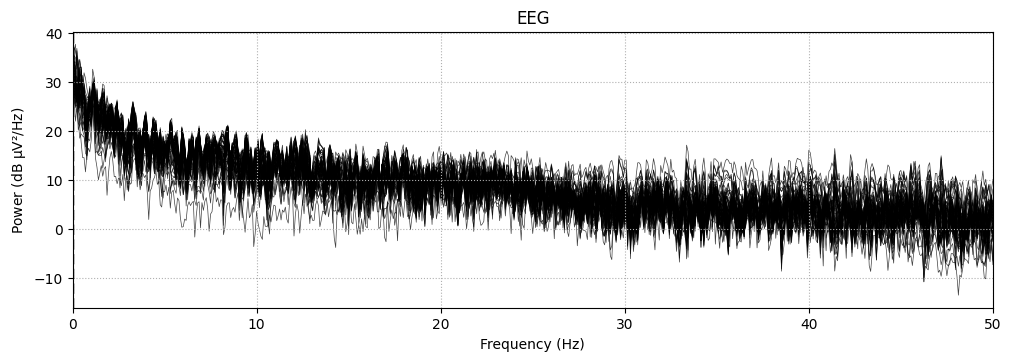

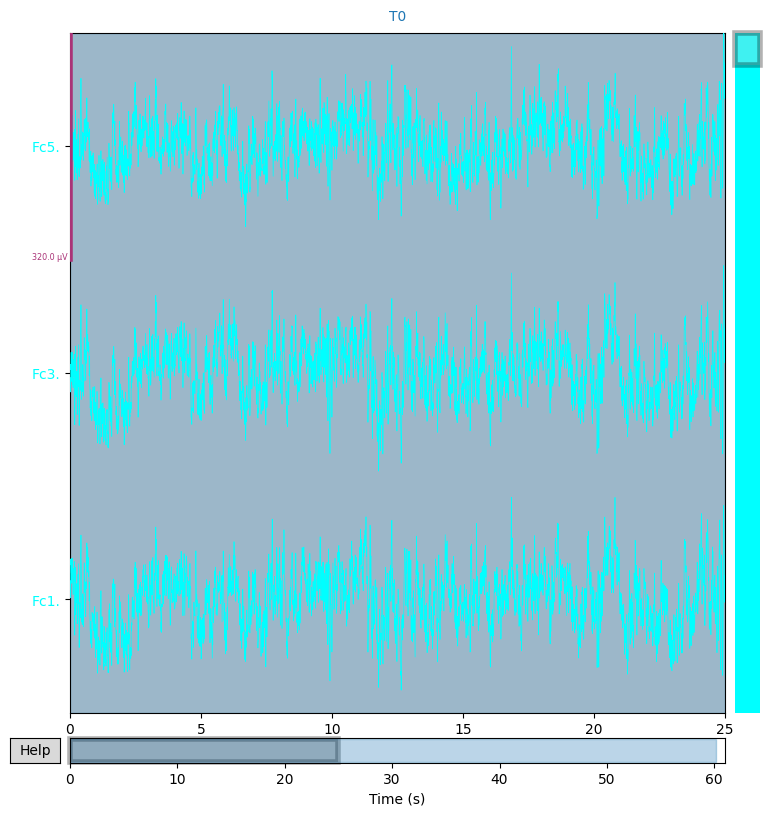

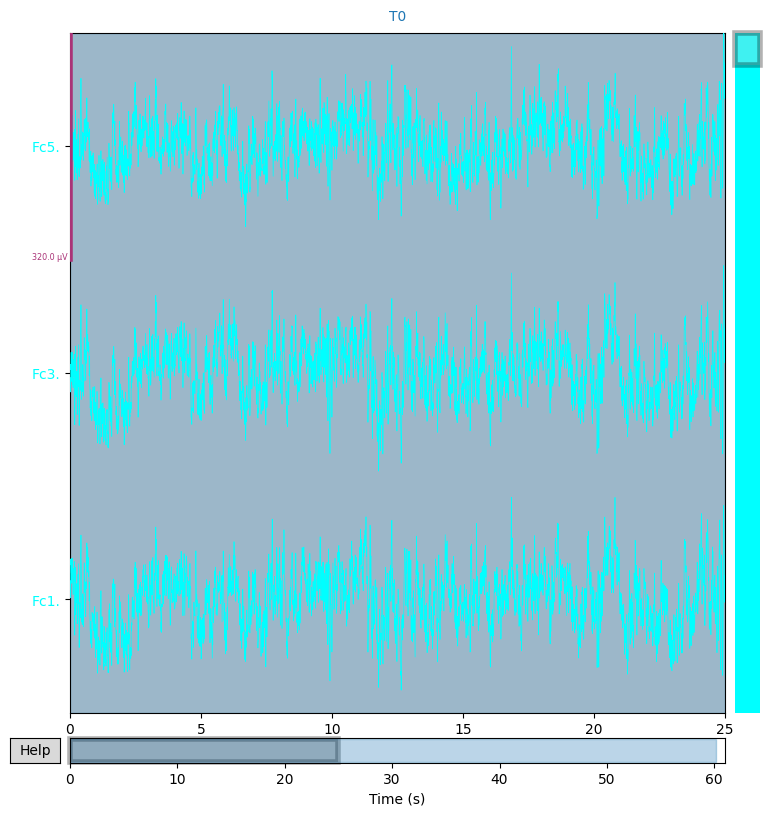

In [ ]:
raw.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)
raw.plot(duration=25, n_channels=3, scalings={'eeg':160e-6})

In [16]:
ica = mne.preprocessing.ICA(n_components=25, random_state=97)
ica.fit(raw)
ica.exclude = [0, 1]  # Example: remove components 0 and 1
raw_cleaned = ica.apply(raw)

Fitting ICA to data using 64 channels (please be patient, this may take a while)


C:\Users\Usuario\AppData\Local\Temp/ipykernel_2908/2863322246.py:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 25 components
Fitting ICA took 8.7s.
Applying ICA to Raw instance
    Transforming to ICA space (25 components)
    Zeroing out 2 ICA components
    Projecting back using 64 PCA components


Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


C:\Users\Usuario\AppData\Local\Temp/ipykernel_2908/1675116418.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_cleaned.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)
c:\ProgramData\Anaconda3\lib\site-packages\mne\viz\utils.py:158: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


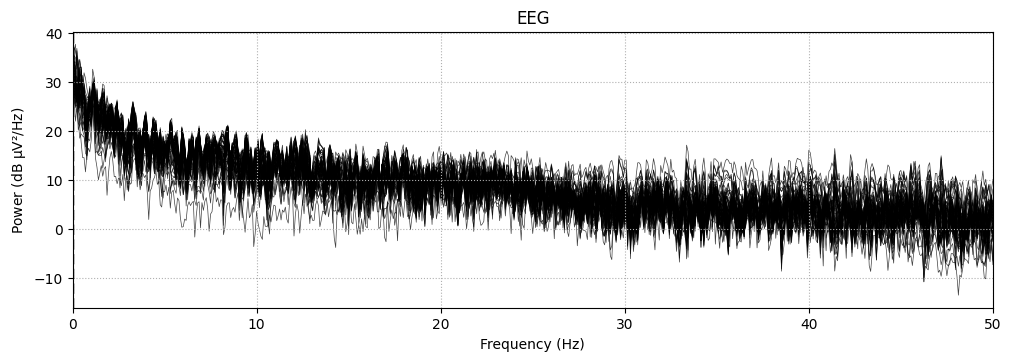

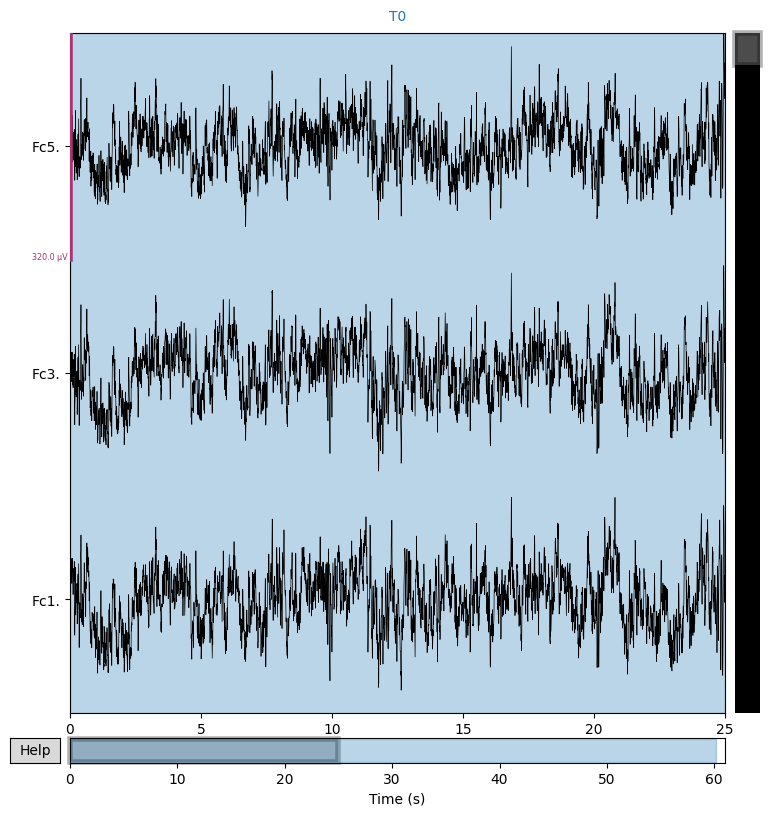

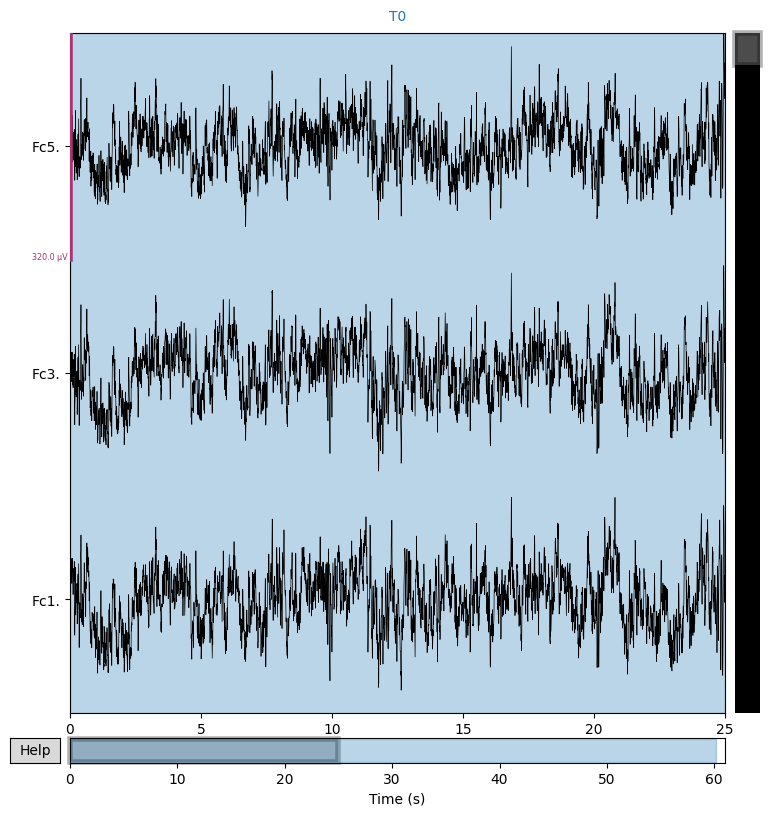

In [17]:
raw_cleaned.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)
raw_cleaned.plot(duration=25, n_channels=3, scalings={'eeg':160e-6})

In [22]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
#ica.fit(raw)
#ica.exclude = [1, 2]  # details on how we picked these are omitted here
#ica.plot_properties(raw, picks=ica.exclude)

In [24]:
ica.fit(raw)

Fitting ICA to data using 64 channels (please be patient, this may take a while)


C:\Users\Usuario\AppData\Local\Temp/ipykernel_2908/130686739.py:1: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 3.6s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=800
Fit,40 iterations on raw data (9760 samples)
ICA components,20
Available PCA components,64
Channel types,eeg
ICA components marked for exclusion,—


In [31]:
raw = mne.io.read_raw_edf(file)
print(raw.info)


print(raw.info.keys())

Extracting EDF parameters from c:\Users\Usuario\Desktop\tandil\files\S001\S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<Info | 8 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: 3 items (dict)
>
dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])


In [38]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: 3 items (dict)
>